# Figures for Literature Review

## Figure 1: Fractals

In [7]:
from matplotlib import pyplot as plt
from matplotlib import collections as mc
import math
%matplotlib inline

In [12]:
import scipy
from scipy.signal import welch as welch
import multiprocessing
from joblib import Parallel, delayed
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
a = (0.0, 0.0)
e = (1.0, 0.0)
ae = (a,e)

In [9]:
def plot_segments(segments):
    fig, ax = plt.subplots()
    lines = mc.LineCollection(segments)
    ax.add_collection(lines)
    ax.margins(0.2)
    ax.set_aspect('equal')
    ax.autoscale()
    return ax

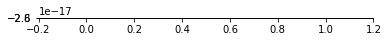

In [10]:
plot_segments([ae]);

<Figure size 432x288 with 0 Axes>

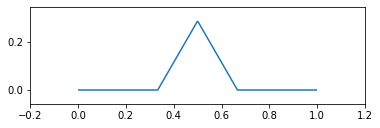

In [13]:
b = ((2*a[0]+e[0]/3, (2*a[1]+e[1])/3))
d = ((a[0]+2*e[0]/3, (a[1]+2*e[1])/3))
k = math.sqrt(3)/6
c = ((a[0]+e[0])/2 - k * (e[1]-a[1]), (a[1]+e[1])/2 + k *(e[0]-a[0]))
plt.gcf().clear()
plot_segments([(a,b), (b,c), (c,d), (d,e)]);

In [11]:
def recurse(segments):
    return [x for s in segments for x in f(s)]

In [14]:
def f(seg):
    a = seg[0]
    e = seg[1]
    b = ((2*a[0]+e[0])/3, (2*a[1]+e[1])/3)
    d = ((a[0]+2*e[0])/3, (a[1]+2*e[1])/3)
    k = math.sqrt(3)/6
    c = ((a[0]+e[0])/2 - k * (e[1]-a[1]), (a[1]+e[1])/2 + k *(e[0]-a[0]))
    return [(a,b), (b,c), (c,d), (d,e)]

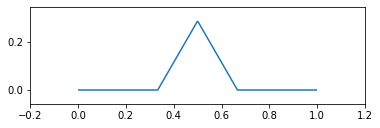

In [15]:
plot_segments(recurse([(a,e)]));

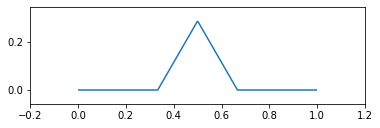

In [20]:
segements = [(a,e)]
for i in range(1):
    segements = recurse(segements)
plot_segments(segements);

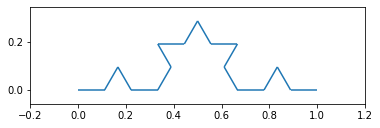

In [16]:
segements = [(a,e)]
for i in range(2):
    segements = recurse(segements)
plot_segments(segements);

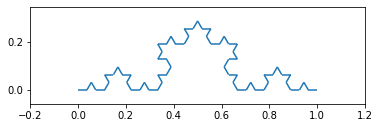

In [17]:
segements = [(a,e)]
for i in range(3):
    segements = recurse(segements)
plot_segments(segements);

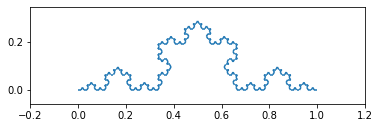

In [18]:
segements = [(a,e)]
for i in range(4):
    segements = recurse(segements)
plot_segments(segements);

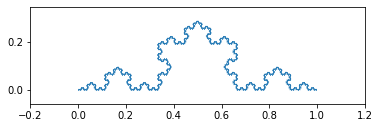

In [19]:
segements = [(a,e)]
for i in range(5):
    segements = recurse(segements)
plot_segments(segements);

# fBm fGn

## The two time signals below have the same H value (0.74) and time-points (1024)

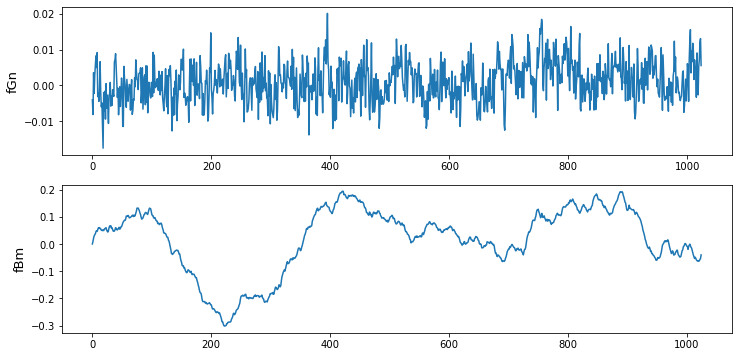

In [20]:
from fbm import FBM
f = FBM(n=1024, hurst=0.75, length=1, method='daviesharte')
fgn_sample = f.fgn()
fbm_sample = f.fbm()
import matplotlib.pyplot
#fgn_plot = matplotlib.pyplot.plot(fgn_sample)
matplotlib.pyplot.show()
fig = matplotlib.pyplot.figure(figsize=(12.0, 6.0))
axes1 = fig.add_subplot(2, 1, 1)
axes2 = fig.add_subplot(2, 1, 2)
axes1.set_ylabel('fGn', fontsize=13)
axes1.plot(fgn_sample)
axes2.set_ylabel('fBm', fontsize=13)
axes2.plot(fbm_sample)
#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('fGnfBm.png', dpi=300, bbox_inches='tight' )

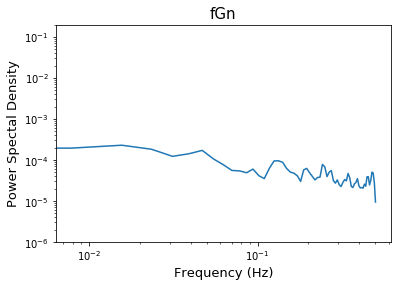

In [22]:
nperseg_fgn = math.floor(len(fgn_sample)/8)
noverlap_fgn = math.floor(nperseg_fgn/2)
wfgn = welch(fgn_sample, fs = 1, nperseg = nperseg_fgn, noverlap = noverlap_fgn)
axes = plt.gca()
axes.set_ylim([0.000001,0.2])
plt.loglog(wfgn[0],wfgn[1])
plt.title('fGn', fontsize=15)
plt.xlabel('Frequency (Hz)', fontsize=13)
plt.ylabel('Power Spectal Density', fontsize=13)
plt.savefig('fGnPSD.png', dpi=300, bbox_inches='tight' )

In [27]:
from sklearn.linear_model import LinearRegression
xfgn = np.log10(wfgn[0])[1:].reshape((-1, 1))
yfgn = np.log10(wfgn[1])[1:]
modelfgn = LinearRegression().fit(xfgn, yfgn)
negbetafgn = modelfgn.coef_
betafgn = negbetafgn*-1
print('Beta =', round(float(betafgn),2))
print('H =', (round(float(betafgn),2)+1)/2)

Beta = 0.58
H = 0.79


<ipython-input-27-d9f38e642c85>:2: RuntimeWarning: divide by zero encountered in log10
  xfgn = np.log10(wfgn[0])[1:].reshape((-1, 1))


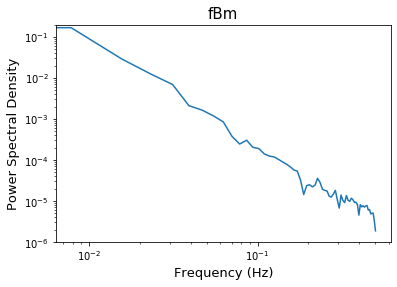

In [21]:
nperseg_fbm = math.floor(len(fbm_sample)/8)
noverlap_fbm = math.floor(nperseg_fbm/2)
wfbm = welch(fbm_sample, fs = 1, nperseg = nperseg_fbm, noverlap = noverlap_fbm)
axes = plt.gca()
axes.set_ylim([0.000001,0.2])
plt.loglog(wfbm[0],wfbm[1])
plt.title('fBm', fontsize=15)
plt.xlabel('Frequency (Hz)', fontsize=13)
plt.ylabel('Power Spectral Density', fontsize=13)
plt.savefig('fBmPSD.png', dpi=300, bbox_inches='tight' )

In [28]:
xfbm = np.log10(wfbm[0])[1:].reshape((-1, 1))
yfbm = np.log10(wfbm[1])[1:]
modelfbm = LinearRegression().fit(xfbm, yfbm)
negbetafbm = modelfbm.coef_
betafbm = negbetafbm*-1
print('Beta =', round(float(betafbm),2))
print('H =', (round(float(betafbm),2)-1)/2)

Beta = 2.53
H = 0.7649999999999999


<ipython-input-28-7dd68bbb9218>:1: RuntimeWarning: divide by zero encountered in log10
  xfbm = np.log10(wfbm[0])[1:].reshape((-1, 1))


# H at 0.5 0.7 and 1

In [29]:
fp5 = FBM(n=1024, hurst=0.5, length=1, method='daviesharte')
fgnp5_sample = fp5.fgn()
fp75 = FBM(n=1024, hurst=0.75, length=1, method='daviesharte')
fgnp75_sample = fp75.fgn()
f1 = FBM(n=1024, hurst=0.99, length=1, method='daviesharte')
fgn1_sample = f1.fgn()

/home/weberam2/.local/lib/python3.8/site-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(


<ipython-input-30-f7adaeacb0a5>:6: RuntimeWarning: divide by zero encountered in log10
  xfgn = np.log10(wfgn[0])[1:].reshape((-1, 1))
<ipython-input-30-f7adaeacb0a5>:6: RuntimeWarning: divide by zero encountered in log10
  xfgn = np.log10(wfgn[0])[1:].reshape((-1, 1))
<ipython-input-30-f7adaeacb0a5>:6: RuntimeWarning: divide by zero encountered in log10
  xfgn = np.log10(wfgn[0])[1:].reshape((-1, 1))


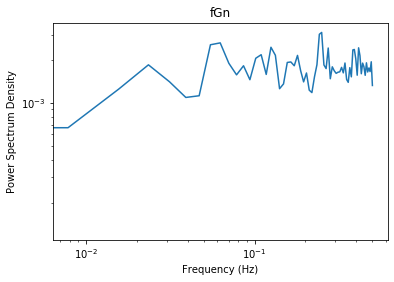

In [30]:
def WelchBH(fgn_sample,):
    nperseg_fgn = math.floor(len(fgn_sample)/8)
    noverlap_fgn = math.floor(nperseg_fgn/2)
    wfgn = welch(fgn_sample, fs = 1, nperseg = nperseg_fgn, noverlap = noverlap_fgn)
    
    xfgn = np.log10(wfgn[0])[1:].reshape((-1, 1))
    yfgn = np.log10(wfgn[1])[1:]
    modelfgn = LinearRegression().fit(xfgn, yfgn)
    negbetafgn = modelfgn.coef_
    betafgn = negbetafgn*-1
    
    return [wfgn,round(float(betafgn),2),(round(float(betafgn),2)+1)/2]

wfgnp5 = WelchBH(fgnp5_sample)
plt.loglog(wfgnp5[0][0],wfgnp5[0][1])
plt.title('fGn')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectrum Density')

wfgnp75 = WelchBH(fgnp75_sample)
wfgn1 = WelchBH(fgn1_sample)

In [127]:
wfgnp75[2]

0.8049999999999999

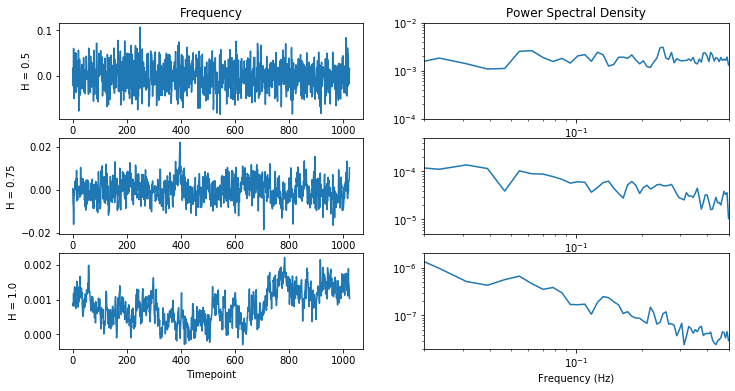

In [53]:
matplotlib.pyplot.show()
fig = matplotlib.pyplot.figure(figsize=(12.0, 6.0))
axes1 = fig.add_subplot(3, 2, 1)
axes2 = fig.add_subplot(3, 2, 3)
axes3 = fig.add_subplot(3, 2, 5)
axes4 = fig.add_subplot(3, 2, 2)
axes5 = fig.add_subplot(3, 2, 4)
axes6 = fig.add_subplot(3, 2, 6)
axes1.set_ylabel('H = 0.5')
axes1.plot(fgnp5_sample)
axes1.set_title('Frequency')
axes2.set_ylabel('H = 0.75')
axes2.plot(fgnp75_sample)
axes3.set_ylabel('H = 1.0')
axes3.plot(fgn1_sample)
axes3.set_xlabel('Timepoint')
#axes4.set_ylabel('PSD')
axes4.loglog(wfgnp5[0][0],wfgnp5[0][1])
axes4.set_xlim(0.02,.5)
axes4.set_ylim(0.0001,0.01)
axes4.set_title('Power Spectral Density')
#axes5.set_ylabel('PSD')
axes5.loglog(wfgnp75[0][0],wfgnp75[0][1])
axes5.set_ylim(0.000005,0.0005)
axes5.set_xlim(0.02,.5)
#axes6.set_ylabel('PSD')
axes6.loglog(wfgn1[0][0],wfgn1[0][1])
axes6.set_ylim(0.00000002,0.000002)
axes6.set_xlim(0.02,.5)
axes6.set_xlabel('Frequency (Hz)')
matplotlib.pyplot.savefig('/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Hurst_HCP/Figures/HurstExamples.png',dpi=300)
matplotlib.pyplot.show()


In [51]:
print('Beta = ', wfgnp5[1], '; H = ', wfgnp5[2])
print('Beta = ', wfgnp75[1], '; H = ', wfgnp75[2])
print('Beta = ', wfgn1[1], '; H = ', wfgn1[2])


Beta =  -0.09 ; H =  0.455
Beta =  0.54 ; H =  0.77
Beta =  1.15 ; H =  1.075


# Hurst in BOLD: Grey, White, and CSF

In [5]:
import scipy
from scipy.signal import welch as welch
import multiprocessing
from joblib import Parallel, delayed
import os 
import nibabel as nib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Slice

In [54]:
example_slice = '/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Fractal/FractalData/2020-09-17_BCCHR_test_AlexW/derivatives/func/FracTool_run1/filtered_func_data_clean.nii.gz'
slice_img = nib.load(example_slice, mmap=False)
slice_array = slice_img.get_fdata()
slice_sq = slice_array[:,:,30,:]


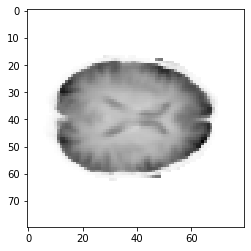

In [55]:
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

## Grey Matter

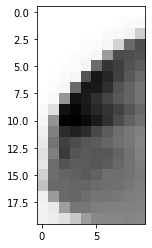

In [56]:
slice_sq = slice_array[20:40,10:20,30,:]
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

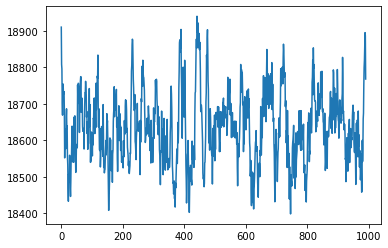

In [79]:
voxelg = slice_array[30,15,30,:]
plt.plot(voxelg)
matplotlib.pyplot.savefig('/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Hurst_HCP/Figures/greymattersignal.png',dpi=300)

0.6


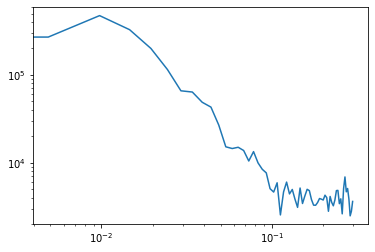

In [80]:
TR = slice_img.header.get_zooms()
TR = TR[3]
print(TR)
nperseg = math.floor(len(voxelg)/8)
noverlap = math.floor(nperseg/2)
wg = welch(voxelg, fs = TR, nperseg = nperseg, noverlap = noverlap)
axes = plt.gca()
axes.set_ylim([2000,600000])
plt.loglog(wg[0],wg[1])
matplotlib.pyplot.savefig('/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Hurst_HCP/Figures/greymatterSDP.png',dpi=300)

In [62]:
from sklearn.linear_model import LinearRegression
xg = np.log10(wg[0])[1:].reshape((-1, 1))
yg = np.log10(wg[1])[1:]
modelg = LinearRegression().fit(xg, yg)
negbetag = modelg.coef_
betag = negbetag*-1
print('Beta =', round(float(betag),2))
print('H =', (round(float(betag),2)+1)/2)

Beta = 1.35
H = 1.175


<ipython-input-62-65e3d10799ca>:2: RuntimeWarning: divide by zero encountered in log10
  xg = np.log10(wg[0])[1:].reshape((-1, 1))


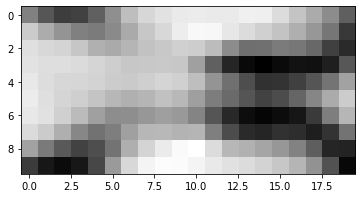

In [63]:
slice_mid = slice_array[35:45,30:50,30,:]
imgplot = plt.imshow(slice_mid[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

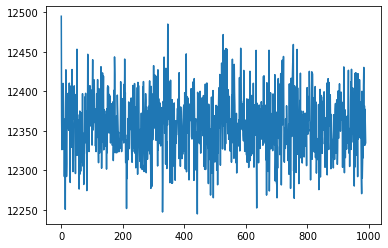

In [81]:
voxelc = slice_array[38,45,30,:]
plt.plot(voxelc)
matplotlib.pyplot.savefig('/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Hurst_HCP/Figures/CSFsignal.png',dpi=300)

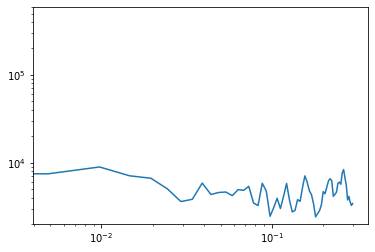

In [82]:

wc = welch(voxelc, fs = TR, nperseg = nperseg, noverlap = noverlap)
axes = plt.gca()
axes.set_ylim([2000,600000])
plt.loglog(wc[0],wc[1])
matplotlib.pyplot.savefig('/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Hurst_HCP/Figures/CSF_SDP.png',dpi=300)

In [66]:
xc = np.log10(wc[0])[1:].reshape((-1, 1))
yc = np.log10(wc[1])[1:]
modelc = LinearRegression().fit(xc, yc)
negbetac = modelc.coef_
betac = negbetac*-1
print('Beta =', round(float(betac),2))
print('H =', (round(float(betac),2)+1)/2)

Beta = 0.08
H = 0.54


<ipython-input-66-46408b2653c6>:1: RuntimeWarning: divide by zero encountered in log10
  xc = np.log10(wc[0])[1:].reshape((-1, 1))


## White Matter

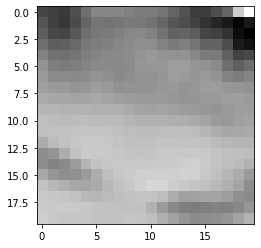

In [67]:
slice_sq = slice_array[20:40,30:50,30,:]
imgplot = plt.imshow(slice_sq[:,:,1],cmap='Greys',  interpolation='nearest')
plt.show()

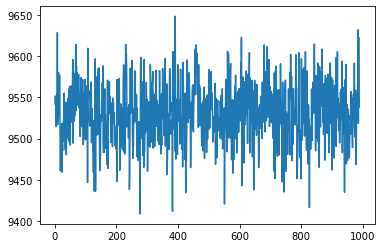

In [83]:
voxelw = slice_array[30,40,30,:]
plt.plot(voxelw)
matplotlib.pyplot.savefig('/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Hurst_HCP/Figures/whitemattersignal.png',dpi=300)

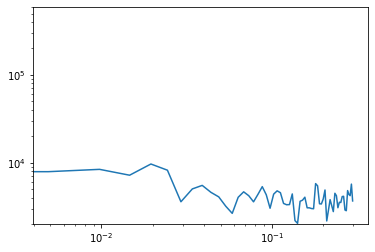

In [84]:
ww = welch(voxelw, fs = TR, nperseg = nperseg, noverlap = noverlap)
axes = plt.gca()
axes.set_ylim([2000,600000])
plt.loglog(ww[0],ww[1])
matplotlib.pyplot.savefig('/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/Hurst_HCP/Figures/whitematterSDP.png',dpi=300)

In [70]:
xw = np.log10(ww[0])[1:].reshape((-1, 1))
yw = np.log10(ww[1])[1:]
modelw = LinearRegression().fit(xw, yw)
negbetaw = modelw.coef_
betaw = negbetaw*-1
print('Beta =', round(float(betaw),2))
print('H =', (round(float(betaw),2)+1)/2)

Beta = 0.2
H = 0.6


<ipython-input-70-01949df122d8>:1: RuntimeWarning: divide by zero encountered in log10
  xw = np.log10(ww[0])[1:].reshape((-1, 1))
